# MACRO ANALYSIS

In [166]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/HP/Desktop/NorthEastern University/Analytics Systems Technology/Capstone/Airline_delay_causes (2).csv')
df.info()
df.columns = df.columns.str.lstrip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58494 entries, 0 to 58493
Data columns (total 21 columns):
year                   58494 non-null int64
month                  58494 non-null int64
carrier                58494 non-null object
carrier_name           58494 non-null object
airport                58494 non-null object
airport_name           58494 non-null object
arr_flights            58436 non-null float64
arr_del15              58422 non-null float64
arr_cancelled          58436 non-null float64
arr_diverted           58436 non-null float64
arr_delay              58436 non-null float64
carrier_ct             58436 non-null float64
carrier_delay          58436 non-null float64
weather_ct             58436 non-null float64
weather_delay          58436 non-null float64
nas_ct                 58436 non-null float64
nas_delay              58436 non-null float64
security_ct            58436 non-null float64
security_delay         58436 non-null float64
late_aircraft_ct       58

In [167]:
pd.isnull(df).any()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights             True
arr_del15               True
arr_cancelled           True
arr_diverted            True
arr_delay               True
carrier_ct              True
carrier_delay           True
weather_ct              True
weather_delay           True
nas_ct                  True
nas_delay               True
security_ct             True
security_delay          True
late_aircraft_ct        True
late_aircraft_delay     True
dtype: bool

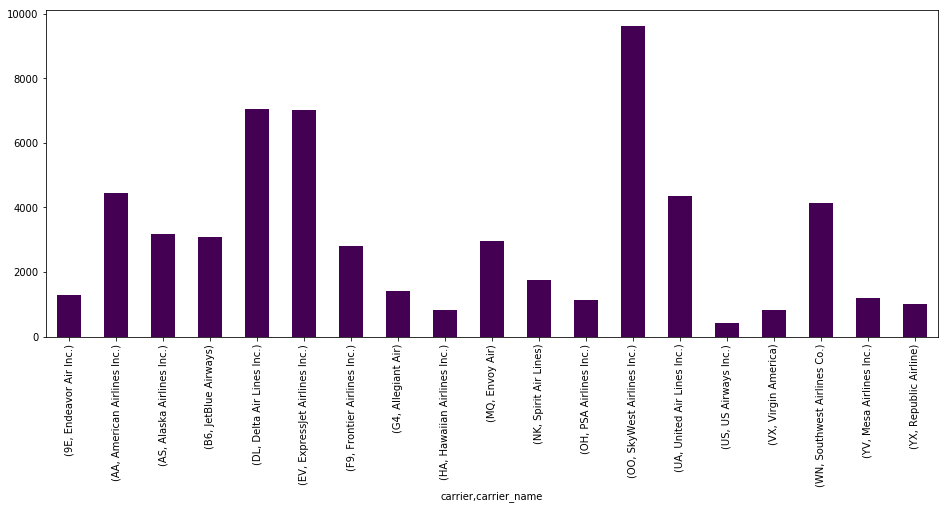

In [168]:
group_by_carrier1 = df.groupby(['carrier','carrier_name'])
number_of_flights=group_by_carrier1.size()
number_of_flights.plot(kind='bar', stacked=True, figsize=[16,6], colormap='viridis')

In [169]:
df1=df.dropna()
pd.isnull(df1).sum().sum()

0

In [170]:
group_by_carrier= df1.groupby(['carrier','carrier_name']).sum

group_by_carrier

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000020476363080>>

In [171]:
group_by_carrier15 = df1.groupby(['carrier','arr_del15'])
group_by_carrier15.size()
count_delays_by_carrier = group_by_carrier15.size().unstack()

In [172]:
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('mode.chained_assignment', None)

In [173]:
df['month'].max()
df['year'].max()
df1['year_and_month'] = df1['year'].apply(str) +'-'+ df1['month'].apply(str)
df1.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_ct', 'carrier_delay', 'weather_ct',
       'weather_delay', 'nas_ct', 'nas_delay', 'security_ct', 'security_delay',
       'late_aircraft_ct', 'late_aircraft_delay', 'year_and_month'],
      dtype='object')

In [174]:
df1['Qtr'] = pd.to_datetime(df1['year_and_month'].values, format='%Y-%m').astype('period[Q]')

In [175]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
c= ['purple','seagreen','GOLD','teal','navy']

In [176]:
df1.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_ct', 'carrier_delay', 'weather_ct',
       'weather_delay', 'nas_ct', 'nas_delay', 'security_ct', 'security_delay',
       'late_aircraft_ct', 'late_aircraft_delay', 'year_and_month', 'Qtr'],
      dtype='object')

In [177]:
flight_delays_sum=df1.pivot_table(index='Qtr', values=delays_list, aggfunc='sum')

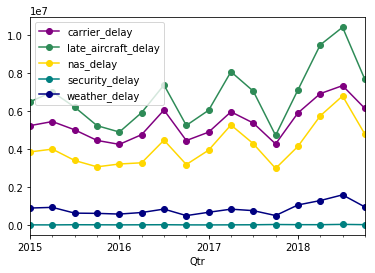

In [179]:
flight_delays_sum=df1.pivot_table(index='Qtr', values=delays_list, aggfunc='sum').plot(marker='o', color=c)

In [34]:
df1['delayed'] = df1['arr_delay'].apply(lambda x: x > 0)

In [35]:
group_by_carrierdelay = df1.groupby(['carrier','delayed'])

In [36]:
group_by_carrierdelay.size()

carrier  delayed
9E       False        74
         True       1203
AA       False        45
         True       4386
AS       False        73
         True       3094
B6       False        16
         True       3059
DL       False       180
         True       6868
EV       False       294
         True       6716
F9       False        62
         True       2742
G4       False        88
         True       1317
HA       False        14
         True        810
MQ       False        75
         True       2881
NK       False        19
         True       1724
OH       False        23
         True       1101
OO       False       295
         True       9310
UA       False       113
         True       4251
US       False        14
         True        420
VX       False         6
         True        812
WN       True       4136
YV       False        53
         True       1131
YX       False        65
         True        952
dtype: int64

In [37]:
count_delays_by_carrierarr = group_by_carrierdelay.size().unstack()
count_delays_by_carrierarr

delayed,False,True
carrier,,
9E,74.0,1203.0
AA,45.0,4386.0
AS,73.0,3094.0
B6,16.0,3059.0
DL,180.0,6868.0
EV,294.0,6716.0
F9,62.0,2742.0
G4,88.0,1317.0
HA,14.0,810.0


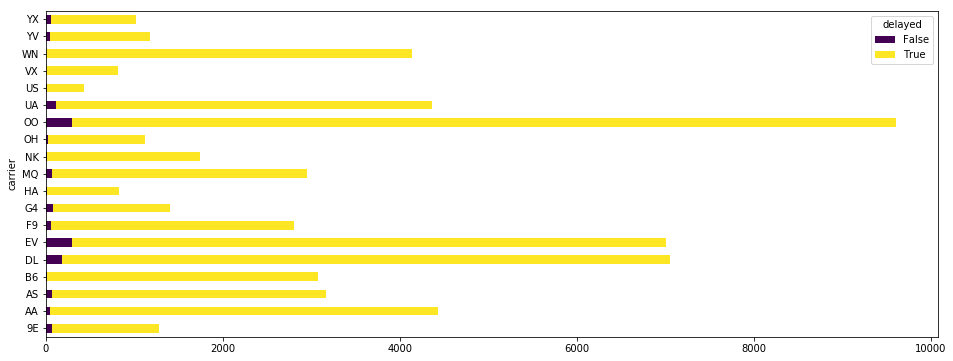

In [38]:
count_delays_by_carrierarr.plot(kind='barh', stacked=True, figsize=[16,6], colormap='viridis')

In [39]:
df1['delayed15'] = df1['arr_del15'].apply(lambda x: x > 0)
group_by_carrier15 = df1.groupby(['carrier','delayed15'])
group_by_carrier15.size()
count_delays_by_carrier15 = group_by_carrier15.size().unstack()
count_delays_by_carrier15

delayed15,False,True
carrier,,
9E,74.0,1203.0
AA,45.0,4386.0
AS,73.0,3094.0
B6,16.0,3059.0
DL,180.0,6868.0
EV,294.0,6716.0
F9,62.0,2742.0
G4,88.0,1317.0
HA,14.0,810.0


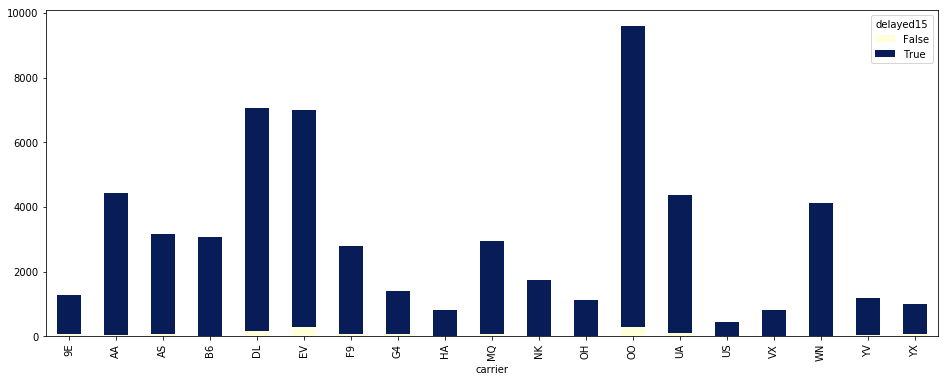

In [40]:
count_delays_by_carrier15.plot(kind='bar', stacked=True, figsize=[16,6], colormap='YlGnBu')

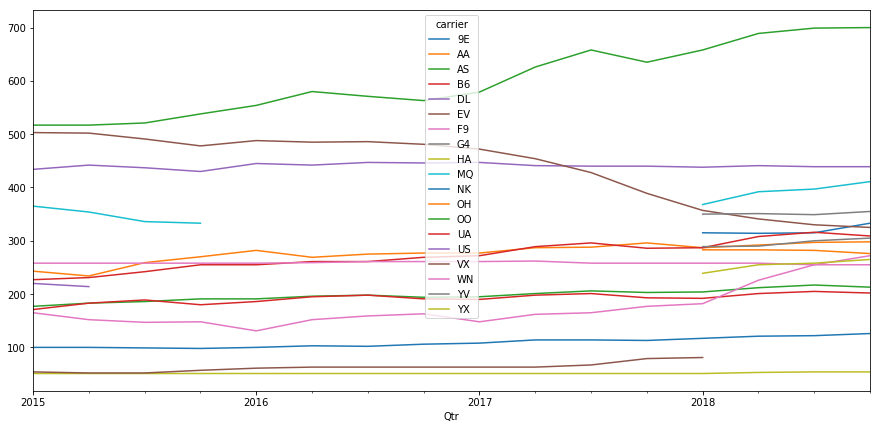

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['Qtr','carrier']).count()['arr_cancelled'].unstack().plot(ax=ax)

In [42]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec

from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

airplanes = df1.set_index('carrier')['carrier_name'].to_dict()
airplanes

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = df1['arr_delay'].groupby(df1['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats
font = {'family' : 'normal', 'weight' :  'bold', 'size' : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

In [43]:
df2 = df1.loc[:, ['carrier_name', 'arr_delay']]
df2['carrier_name'] = df2['carrier_name'].replace(airplanes)
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse','magenta','white','cyan','beige','chocolate','coral']

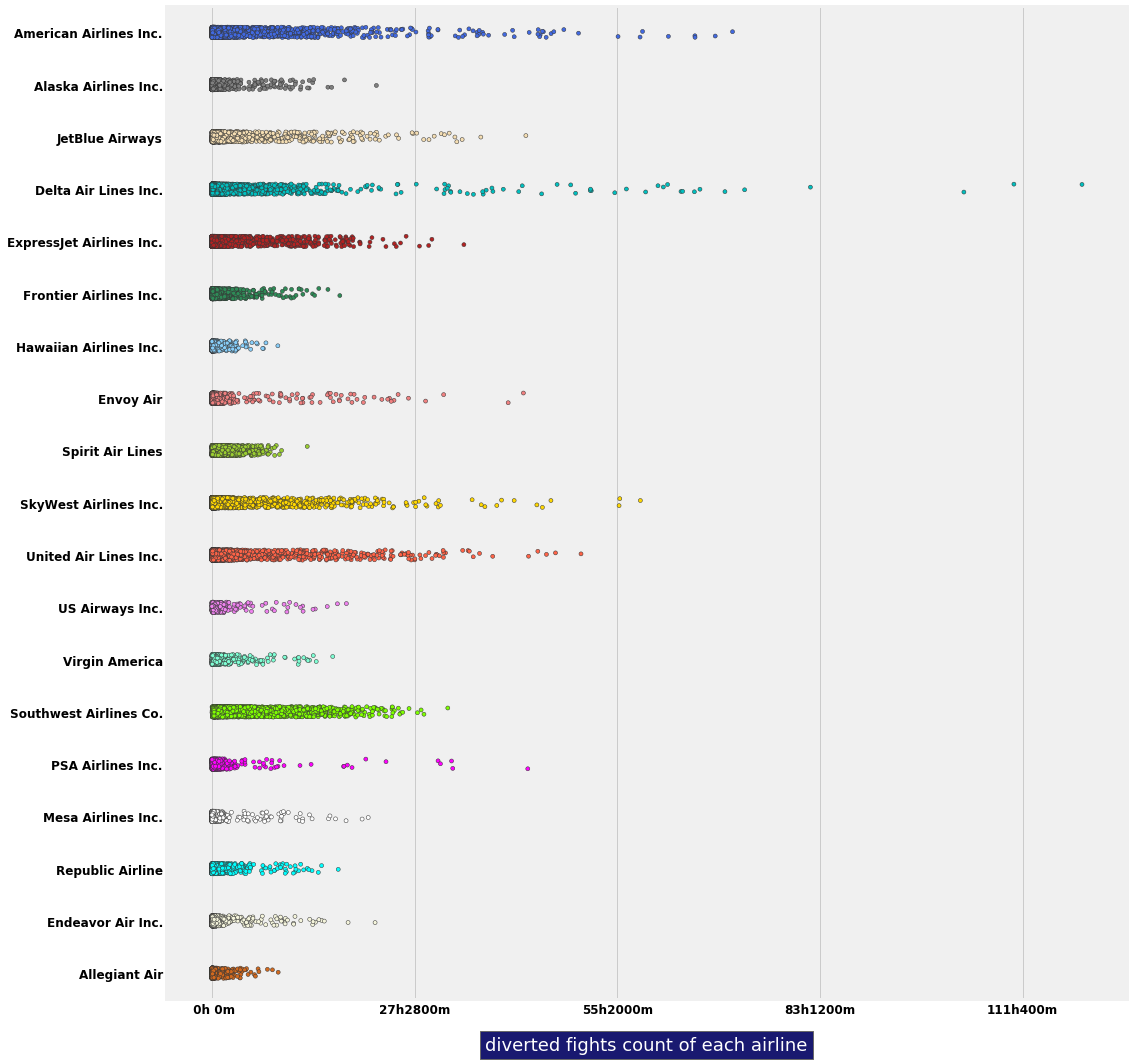

In [44]:
fig = plt.figure(1, figsize=(16,15))
mygraph = sns.stripplot(y="carrier_name", x="arr_delay", size = 4, palette = colors,
                    data=df2, linewidth = .5,  jitter=True)
plt.setp(mygraph.get_xticklabels(), fontsize=12)
plt.setp(mygraph.get_yticklabels(), fontsize=12)
mygraph.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,3600)])
                         for x in mygraph.get_xticks()])
plt.xlabel('diverted fights count of each airline', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
mygraph.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)

In [45]:
# to calculate on anaverage how many flights have been cancelled for each carrier

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec

from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv('C:/Users/HP/Desktop/NorthEastern University/Analytics Systems Technology/Capstone/Airline_delay_causes (2).csv')
df.info()
df.columns = df.columns.str.lstrip()
df1=df.dropna()
pd.isnull(df1).sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58494 entries, 0 to 58493
Data columns (total 21 columns):
year                                 58494 non-null int64
 month                               58494 non-null int64
carrier                              58494 non-null object
carrier_name                         58494 non-null object
airport                              58494 non-null object
airport_name                         58494 non-null object
arr_flights                          58436 non-null float64
arr_del15                            58422 non-null float64
arr_cancelled                        58436 non-null float64
arr_diverted                         58436 non-null float64
 arr_delay                           58436 non-null float64
carrier_ct                           58436 non-null float64
 carrier_delay                       58436 non-null float64
 weather_ct (weather)                58436 non-null float64
weather_delay                        58436 non-null float64

0

In [47]:
df1.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_ct', 'carrier_delay', 'weather_ct (weather)',
       'weather_delay', 'nas_ct (National Aviation system)', 'nas_delay',
       'security_ct', 'security_delay', 'late_aircraft_ct',
       'late_aircraft_delay'],
      dtype='object')

In [48]:
df1['year_and_month'] = df1['year'].apply(str) +'-'+ df1['month'].apply(str)
df1.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_ct', 'carrier_delay', 'weather_ct (weather)',
       'weather_delay', 'nas_ct (National Aviation system)', 'nas_delay',
       'security_ct', 'security_delay', 'late_aircraft_ct',
       'late_aircraft_delay', 'year_and_month'],
      dtype='object')

In [49]:
df1['Qtr'] = pd.to_datetime(df1['year_and_month'].values, format='%Y-%m').astype('period[Q]')

In [50]:
airplanes = df1.set_index('carrier')['carrier_name'].to_dict()
airplanes

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'ExpressJet Airlines Inc.',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'Envoy Air',
 'NK': 'Spirit Air Lines',
 'OO': 'SkyWest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.',
 'OH': 'PSA Airlines Inc.',
 'YV': 'Mesa Airlines Inc.',
 'YX': 'Republic Airline',
 '9E': 'Endeavor Air Inc.',
 'G4': 'Allegiant Air'}

In [51]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = df1['arr_cancelled'].groupby(df1['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
carrier,,,,
US,434.0,405.0,9.370968,0.0
VX,818.0,112.0,3.262836,0.0
HA,824.0,25.0,0.933252,0.0
YX,1017.0,353.0,9.931170,0.0
OH,1124.0,1286.0,10.560498,0.0
YV,1184.0,231.0,4.670608,0.0
9E,1277.0,329.0,4.976507,0.0
G4,1405.0,44.0,0.547331,0.0
NK,1743.0,266.0,6.604131,0.0


In [52]:
font = {'family' : 'normal', 'weight' :  'bold', 'size' : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

In [53]:
df2 = df1.loc[:, ['carrier_name', 'arr_cancelled']]
df2['carrier_name'] = df2['carrier_name'].replace(airplanes)

In [54]:
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse','magenta','white','cyan','beige','chocolate','coral']

Text(0.5, 1.0, 'Mean cancellations')

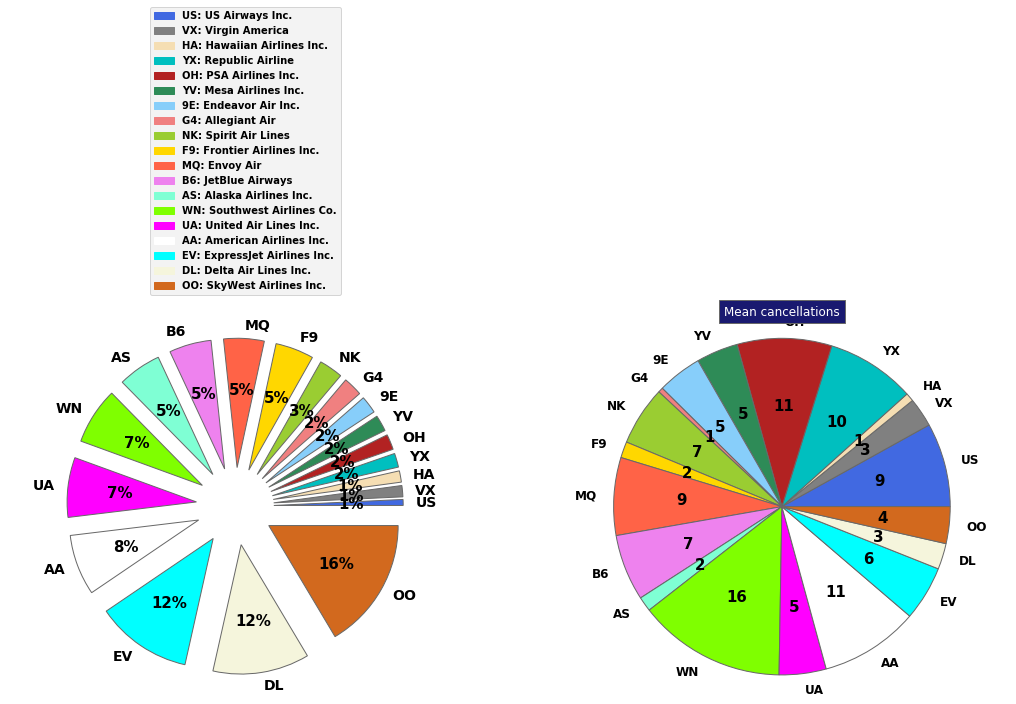

In [55]:
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(airplanes))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(airplanes)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('', bbox={'facecolor':'midnightblue', 'pad':10},
              color = 'w',fontsize=10)
comp_handler = []
for i in range(len(airplanes)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + airplanes[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 10, bbox_transform=plt.gcf().transFigure)

sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(airplanes))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(airplanes)): 
    texts[i].set_fontsize(12)
ax2.axis('equal')
ax2.set_title('Mean cancellations', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=12)




# MICRO ANALYSIS

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

In [138]:
import pandas as pd
airport_df = pd.read_csv("C:/Users/HP/Desktop/NorthEastern University/Analytics Systems Technology/Capstone/Airline_delay_causes (2).csv")
airport_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,...,carrier_ct,carrier_delay,weather_ct,weather_delay,nas_ct,nas_delay,security_ct,security_delay,late_aircraft_ct,late_aircraft_delay
0,2015,1,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1369.0,322.0,86.0,3.0,...,73.31,5273.0,8.44,999.0,136.78,6358.0,0.00,0.0,103.47,7425.0
1,2015,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2633.0,445.0,41.0,4.0,...,157.17,10914.0,25.21,1460.0,107.82,3293.0,1.36,42.0,153.43,9552.0
2,2015,1,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12466.0,2463.0,203.0,6.0,...,645.29,66714.0,64.66,5055.0,765.92,24137.0,4.14,123.0,982.99,71284.0
3,2015,1,AA,American Airlines Inc.,OGG,"Kahului, HI: Kahului Airport",100.0,22.0,3.0,0.0,...,11.53,1207.0,0.00,0.0,6.48,188.0,0.00,0.0,4.00,381.0
4,2015,1,AA,American Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",169.0,50.0,0.0,4.0,...,28.69,2602.0,0.00,0.0,15.04,523.0,0.00,0.0,6.27,1050.0


In [139]:
# shape
print(airport_df.shape)

(58494, 21)


In [140]:
# head
print(airport_df.head(20))

    year  month carrier            carrier_name airport  \
0   2015      1      AA  American Airlines Inc.     JFK   
1   2015      1      AA  American Airlines Inc.     LAX   
2   2015      1      AA  American Airlines Inc.     DFW   
3   2015      1      AA  American Airlines Inc.     OGG   
4   2015      1      AA  American Airlines Inc.     HNL   
5   2015      1      AA  American Airlines Inc.     SFO   
6   2015      1      AA  American Airlines Inc.     ATL   
7   2015      1      AA  American Airlines Inc.     BOS   
8   2015      1      AA  American Airlines Inc.     ONT   
9   2015      1      AA  American Airlines Inc.     DCA   
10  2015      1      AA  American Airlines Inc.     LAS   
11  2015      1      AA  American Airlines Inc.     PHX   
12  2015      1      AA  American Airlines Inc.     IAD   
13  2015      1      AA  American Airlines Inc.     JAX   
14  2015      1      AA  American Airlines Inc.     MIA   
15  2015      1      AA  American Airlines Inc.     TPA 

In [141]:
# statistical summary
print(airport_df.describe())

               year         month   arr_flights     arr_del15  arr_cancelled  \
count  58494.000000  58494.000000  58436.000000  58422.000000   58436.000000   
mean    2016.674462      6.508821    416.264015     75.482900       6.075399   
std        1.172117      3.450099   1095.908134    187.698892      24.955904   
min     2015.000000      1.000000      1.000000      0.000000       0.000000   
25%     2016.000000      4.000000     57.000000      8.000000       0.000000   
50%     2017.000000      7.000000    118.000000     21.000000       1.000000   
75%     2018.000000     10.000000    298.000000     55.000000       4.000000   
max     2018.000000     12.000000  21977.000000   4176.000000    1286.000000   

       arr_diverted      arr_delay    carrier_ct  carrier_delay    weather_ct  \
count  58436.000000   58436.000000  58436.000000   58436.000000  58436.000000   
mean       1.013553    4720.702803     21.650720    1480.935998      2.407482   
std        4.180085   12823.428079  

In [142]:
airport_df.isnull().values.any()

True

In [143]:
airport_df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_ct             float64
carrier_delay          float64
weather_ct             float64
weather_delay          float64
nas_ct                 float64
nas_delay              float64
security_ct            float64
security_delay         float64
late_aircraft_ct       float64
late_aircraft_delay    float64
dtype: object

In [144]:
airport_df.month.head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [145]:
###Total Delays according to different factors statistics:

### weather_ct: Number of flights delayed due to weather.
### nas_ct: Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
### late_aircraft_ct: Number of flights delayed due to a previous flight using the same aircraft being late.
### security_ct: Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
### carrier_ct: Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).


###Total time delayed according to different factors statistics:

### weather_delay: Total time (minutes) of delayed flights due to weather.
### nas_delay: Total time (minutes) of delayed flights due to National Aviation System.
### late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.
### security_delay: Total time (minutes) of delayed flights due to security.
### carrier_delay: Total time (minutes) of delayed flights due to air carrier.

In [146]:
airport_df['season'] = np.where(airport_df['month'].isin([1,12,2]), 'winter', 
                                np.where(airport_df['month'].isin([3,4,5]),'spring',
                                np.where(airport_df['month'].isin([6,7,8]),'summer','fall')))
airport_df['season1'] = np.where(airport_df['month'].isin([1,12,2]), 'winter', 
                                np.where(airport_df['month'].isin([3,4,5]),'spring',
                                np.where(airport_df['month'].isin([6,7,8]),'summer','fall')))

# Weather delays

In [147]:
airport_df['weather_delay'].sum()

13425150.0

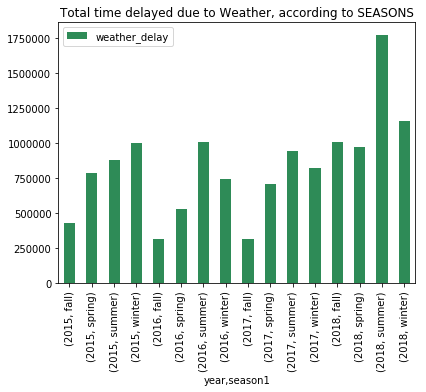

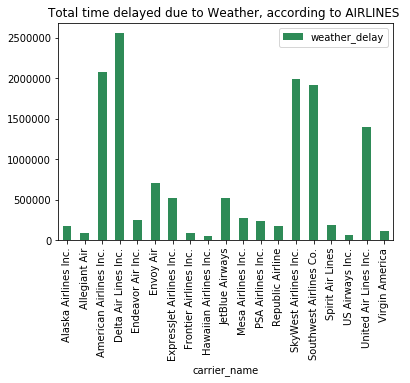

In [148]:
year1=airport_df.groupby(['year','season1']).agg([('weather_delay',sum)])
year1.plot.bar(y='weather_delay',color=['seagreen'], figsize=[6.4, 4.8]) 
plt.title('Total time delayed due to Weather, according to SEASONS')
print()


carrier1=airport_df.groupby(['carrier_name']).agg([('weather_delay',sum)])
carrier1.plot.bar(y='weather_delay',color=['seagreen'])
plt.title('Total time delayed due to Weather, according to AIRLINES ')
print()

In [281]:
airport_df['weather_ct'].sum()

140683.63999999998

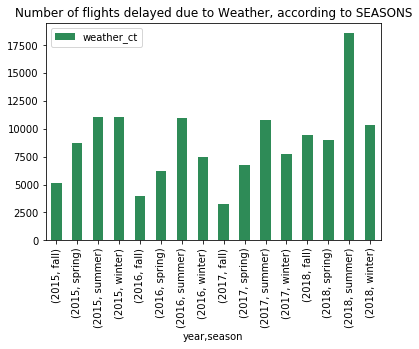

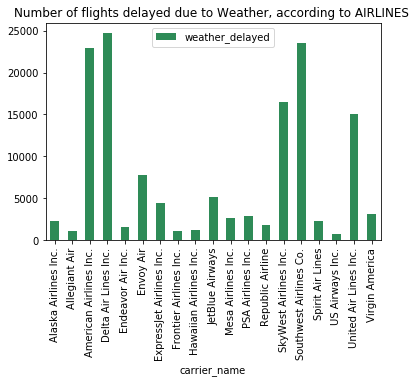

In [149]:
year=airport_df.groupby(['year','season']).agg([('weather_ct',sum)])
year.plot.bar(y='weather_ct',color=['seagreen']) 
plt.title('Number of flights delayed due to Weather, according to SEASONS')
print()


carrier=airport_df.groupby(['carrier_name']).agg([('weather_delayed',sum)])
carrier.plot.bar(y='weather_ct',color=['seagreen'])
plt.title('Number of flights delayed due to Weather, according to AIRLINES ')
print()

# National aviation system delays

In [150]:
airport_df['nas_delay'].sum()

66495601.0

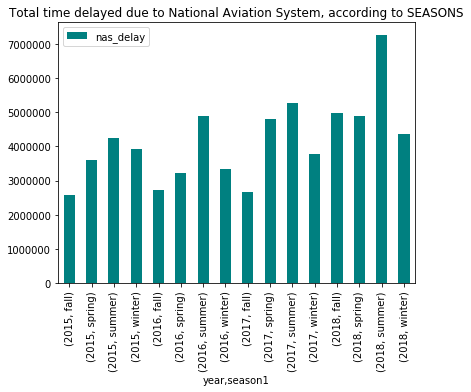

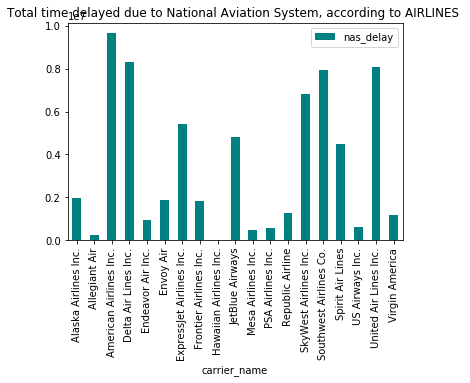

In [151]:
year1=airport_df.groupby(['year','season1']).agg([('nas_delay',sum)])
year1.plot.bar(y='nas_delay',color=['teal'], figsize=[6.4, 4.8]) 
plt.title('Total time delayed due to National Aviation System, according to SEASONS')
print()


carrier1=airport_df.groupby(['carrier_name']).agg([('nas_delay',sum)])
carrier1.plot.bar(y='nas_delay',color=['teal'])
plt.title('Total time delayed due to National Aviation System, according to AIRLINES ')
print()

In [152]:
airport_df['nas_ct'].sum()

1387477.99

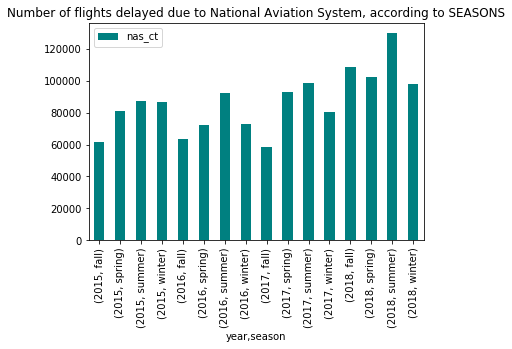

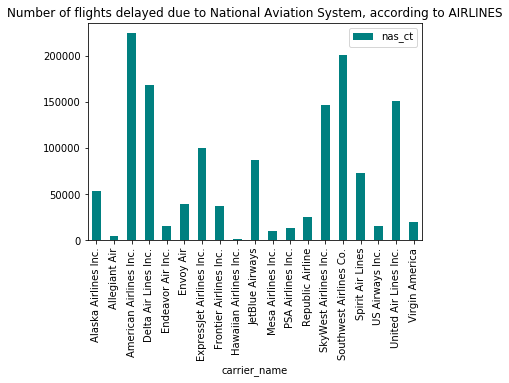

In [153]:
year=airport_df.groupby(['year','season']).agg([('nas_ct',sum)])
year.plot.bar(y='nas_ct',color=['teal'])
plt.title('Number of flights delayed due to National Aviation System, according to SEASONS')
print()

carrier=airport_df.groupby(['carrier_name']).agg([('nas_ct',sum)])
carrier.plot.bar(y='nas_ct',color=['teal'])
plt.title('Number of flights delayed due to National Aviation System, according to AIRLINES')
print()

# Late aircraft delays

In [154]:
airport_df['late_aircraft_delay'].sum()

109014457.0

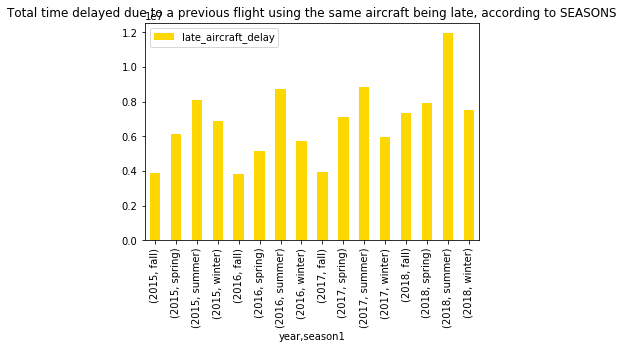

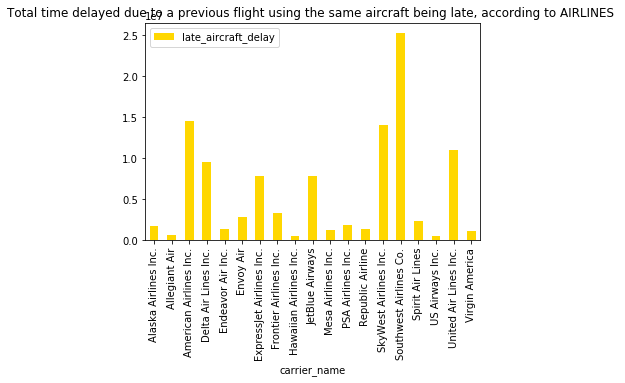

In [155]:
year1=airport_df.groupby(['year','season1']).agg([('late_aircraft_delay',sum)])
year1.plot.bar(y='late_aircraft_delay',color=['GOLD']) 
plt.title('Total time delayed due to a previous flight using the same aircraft being late, according to SEASONS')
print()


carrier1=airport_df.groupby(['carrier_name']).agg([('late_aircraft_delay',sum)])
carrier1.plot.bar(y='late_aircraft_delay',color=['GOLD'])
plt.title('Total time delayed due to a previous flight using the same aircraft being late, according to AIRLINES ')
print()

In [156]:
airport_df['late_aircraft_ct'].sum()

1608438.75

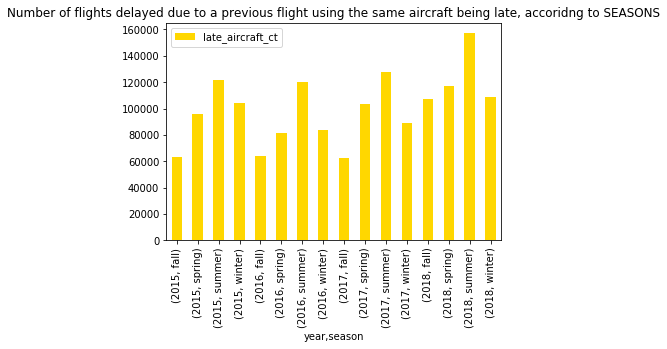

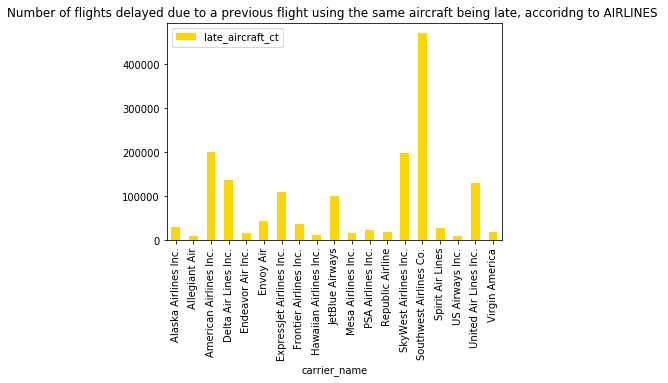

In [157]:
year=airport_df.groupby(['year','season']).agg([('late_aircraft_ct',sum)])
year.plot.bar(y='late_aircraft_ct',color=['GOLD'])
plt.title('Number of flights delayed due to a previous flight using the same aircraft being late, accoridng to SEASONS')
print()

carrier=airport_df.groupby(['carrier_name']).agg([('late_aircraft_ct',sum)])
carrier.plot.bar(y='late_aircraft_ct',color=['GOLD'])
plt.title('Number of flights delayed due to a previous flight using the same aircraft being late, accoridng to AIRLINES ')
print()

# Security delays

In [158]:
airport_df['security_delay'].sum()

383611.0

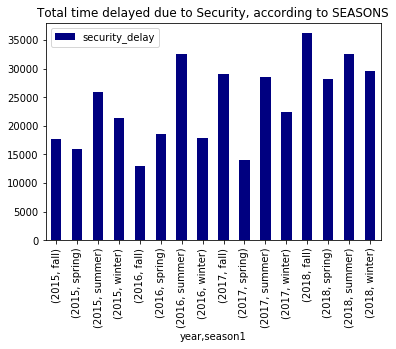

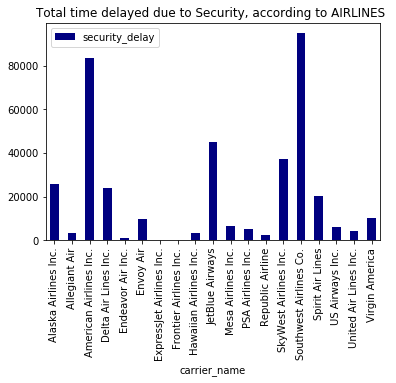

In [159]:
year1=airport_df.groupby(['year','season1']).agg([('security_delay',sum)])
year1.plot.bar(y='security_delay',color=['navy']) 
plt.title('Total time delayed due to Security, according to SEASONS')
print()


carrier1=airport_df.groupby(['carrier_name']).agg([('security_delay',sum)])
carrier1.plot.bar(y='security_delay',color=['navy'])
plt.title('Total time delayed due to Security, according to AIRLINES ')
print()

In [160]:
airport_df['security_ct'].sum()

8081.75

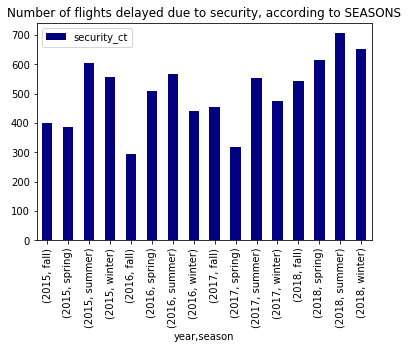

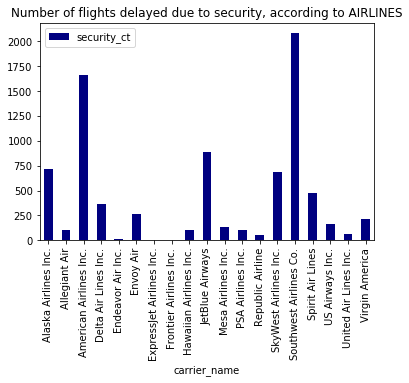

In [161]:
year=airport_df.groupby(['year','season']).agg([('security_ct',sum)])
year.plot.bar(y='security_ct',color=['navy'])
plt.title('Number of flights delayed due to security, according to SEASONS')
print()

carrier=airport_df.groupby(['carrier_name']).agg([('security_ct',sum)])
carrier.plot.bar(y='security_ct',color=['navy'])
plt.title('Number of flights delayed due to security, according to AIRLINES')
print()

# Carriers delays (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

In [162]:
airport_df['carrier_delay'].sum()

86539976.0

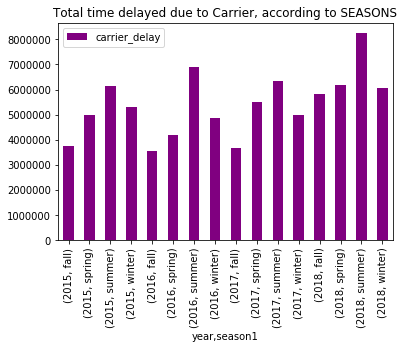

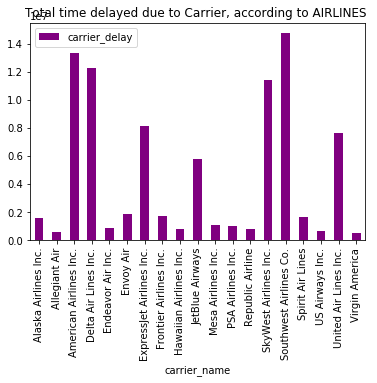

In [163]:
year1=airport_df.groupby(['year','season1']).agg([('carrier_delay',sum)])
year1.plot.bar(y='carrier_delay',color=['purple']) 
plt.title('Total time delayed due to Carrier, according to SEASONS')
print()


carrier1=airport_df.groupby(['carrier_name']).agg([('carrier_delay',sum)])
carrier1.plot.bar(y='carrier_delay',color=['purple'])
plt.title('Total time delayed due to Carrier, according to AIRLINES ')
print()

In [164]:
airport_df['carrier_ct'].sum()

1265181.4999999998

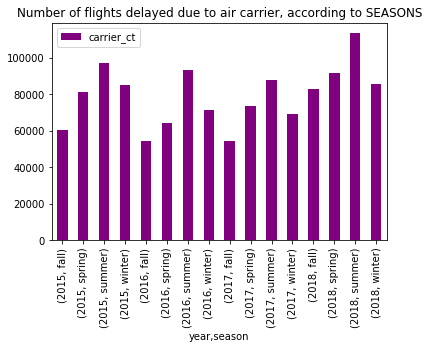

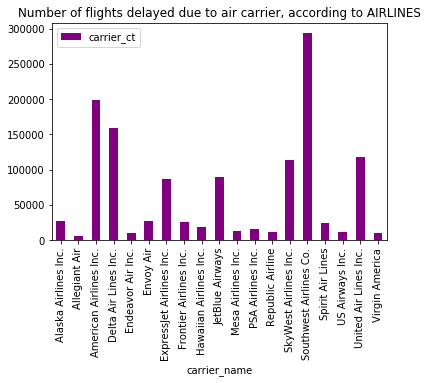

In [165]:
year=airport_df.groupby(['year','season']).agg([('carrier_ct',sum)])
year.plot.bar(y='carrier_ct',color=['purple'])
plt.title('Number of flights delayed due to air carrier, according to SEASONS')
print()

carrier=airport_df.groupby(['carrier_name']).agg([('carrier_ct',sum)])
carrier.plot.bar(y='carrier_ct',color=['purple'])
plt.title('Number of flights delayed due to air carrier, according to AIRLINES')
print()

# MACHINE LEARNING- Multiple Linear Regression for Seasons and Year

In [50]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/HP/Desktop/NorthEastern University/Analytics Systems Technology/Capstone/Airline_delay_causes (3).csv')
X = dataset.iloc[:, :-13].values
y = dataset.iloc[:, 3].values
print(X)
print(y)

[[2015 'Winter']
 [2015 'Winter']
 [2015 'Winter']
 ...
 [2018 'Winter']
 [2018 'Winter']
 [2018 'Winter']]
[ 322  445 2463 ...    4    3   22]


In [51]:
# Encoding X categorical data + HotEncoding
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
#INDEPENDENT VALUES X 
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)
                                #Turn the 'C' column into Dummy Variables 
#Avoding the Dummy Varible Trap 
X=X[:,1:] 
                                #Remove the first column from X  at 0 index 
                                #Take one Dummy variables away manually for some libraries 
    
    
print(X) 

[[0.000e+00 0.000e+00 1.000e+00 2.015e+03]
 [0.000e+00 0.000e+00 1.000e+00 2.015e+03]
 [0.000e+00 0.000e+00 1.000e+00 2.015e+03]
 ...
 [0.000e+00 0.000e+00 1.000e+00 2.018e+03]
 [0.000e+00 0.000e+00 1.000e+00 2.018e+03]
 [0.000e+00 0.000e+00 1.000e+00 2.018e+03]]


In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
#Fitting the Multiple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
#Predicting the Test set Results 
y_pred= regressor.predict(X_test)
print('y_pred is:', y_pred)
print('y_test is:', y_test)

y_pred is: [ 58.4581393   54.36133218  70.13431312 ...  82.42473446 100.46370002
 100.46370002]
y_test is: [ 20   1   7 ... 278  83  62]
